***Paradise News:***

https://www.paradisepost.com/tag/camp-fire/ 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns
%matplotlib inline
import lxml.html as lx
import requests
import requests_cache
import nltk
import nltk.corpus
import time
import re
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
requests_cache.install_cache("my_cache_paradise")

In [4]:
def total_articles(url): 
    response = requests.get(url)
    time.sleep(1)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    dup_links = html.xpath("//h4/a/@href")
    links = list(set(dup_links))
    return links

In [5]:
#total_articles("https://www.paradisepost.com/tag/camp-fire/") ##10 most current articles 

In [6]:
#accounting for multiple pages
def mult_pages(url, page): 
    """takes in url as a string and number of pages wanting to read through (each page will give 10 articles)"""
    empty = []
    for i in list(range(0,page)):
        current_iterate = total_articles("https://www.paradisepost.com/tag/camp-fire/" + ("page" + str(i)))
        empty = empty + current_iterate
    return empty 

In [7]:
mult_pages("https://www.paradisepost.com/tag/camp-fire/", 1) ##10 most current articles 

['https://www.paradisepost.com/2019/02/26/north-valley-community-foundation-releases-100000-more-in-grants-for-camp-fire-relief/',
 'https://www.paradisepost.com/2019/02/27/symphony-orchestra-will-host-concerts-honoring-first-responders-teachers/',
 'https://www.paradisepost.com/2019/03/01/help-needed-to-learn-more-about-three-victims/',
 'https://www.paradisepost.com/2019/02/27/pge-delayed-repairs-for-years-on-transmission-line-linked-to-lethal-camp-fire/',
 'https://www.paradisepost.com/2019/03/01/county-accepting-applications-for-alternative-debris-removal-program-until-march-15/',
 'https://www.paradisepost.com/2019/02/28/pge-equipment-likely-to-be-blamed-for-starting-lethal-camp-fire-utility-says/',
 'https://www.paradisepost.com/2019/02/28/local-4-h-members-help-paradise-youth-rebuild/',
 'https://www.paradisepost.com/2019/03/01/lime-saddle-campground-in-oroville-opened-exclusively-to-camp-fire-survivors/',
 'https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-hel

In [56]:
#take out related articles. receive the text 
def single_article(url): 
    response = requests.get(url)
    time.sleep(1)
    html = lx.fromstring(response.text)
    
    #title 
    title = html.xpath("//h1[contains(@class, 'entry-title')]/span/text()")
    title = ' '.join(title)
    title = title.strip("\n")
    title = title.strip("\t")
   
    #text
    text = html.xpath("//div[contains(@class, 'article-body')]/div[contains(@class, 'body-copy')]/p/text()[not(descendant::em)] | ///div[contains(@class, 'article-body')]/div[contains(@class, 'body-copy')]//ul/li/text()")
    text = ' '.join(text)
    text = text.replace("\n", '')
    text = text.replace("\t", '')
    
    #dates
    dates = html.xpath("///div[contains(@class, 'time')]//time/@datetime")[0]
    #first date is published, second date is updated 
    
    return {"url": url, "text": text, "title": title, "dates": dates}

In [57]:
single_article("https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-help-a-journey-to-recovery/")

{'url': 'https://www.paradisepost.com/2019/03/02/after-the-flames-a-call-for-help-a-journey-to-recovery/',
 'text': 'The morning of the Camp Fire, former Paradise resident Ashley Joyner was at home, watching over seven children ranging in age from 17 to just one year old. Two of the children were her own and five belonged to her friend, who she regularly helped by babysitting. “That morning, I went and dropped my kids off at the (school) bus stop. There was no sign of a fire,” Joyner said. “Finally the bus showed up, and not even 15-20 minutes later, I’m getting phone calls from the school, telling me I got to go pick up the kids.” Joyner said as soon as she stepped outside, “it looked like a volcano had erupted.” What happened next was similar to so many other stories from that terrible day, but Joyner’s story was — at least partially — captured by her emotional 911 call that morning. https://www.chicoer.com/wp-content/uploads/2019/02/11-08-18-08.35.57-Phones-02-TEL-POS-2_Redacted.wav

In [58]:
def all_articles(url, page): 
    listing_numb = []
    all_pages = mult_pages(url, page)
    for i in list(range(0, len(all_pages))):
        listing_numb = listing_numb + [single_article(all_pages[i])]
    return pd.DataFrame(listing_numb)

In [59]:
one_month = all_articles("https://www.paradisepost.com/tag/camp-fire/", 8)
#one_month #camp fire articles in the past month for paradise website 

##takes roughly 2 minutes

In [60]:
one_month["dates"] = pd.to_datetime(one_month["dates"])
date_sort = one_month.sort_values(by = "dates")
#date_sort #sorted by date
date_sort

,dates,text,title,url
73,2019-02-04 14:04:29,PARADISE — Emotions and tempers ran high Monda...,No RVs or temporary housing on property until ...,https://www.paradisepost.com/2019/02/04/no-rvs...
75,2019-02-05 15:20:23,The Paradise Unified School District is going ...,PUSD to ask for requests for proposals on tree...,https://www.paradisepost.com/2019/02/05/pusd-t...
79,2019-02-05 15:22:37,Theatre on the Ridge is reopening on Feb. ...,"Theatre on the Ridge reopens, Radioland show r...",https://www.paradisepost.com/2019/02/05/theatr...
71,2019-02-05 15:45:25,Since the great (not in a good way) California...,Out with the Dogs: Three in a travel trailer,https://www.paradisepost.com/2019/02/05/out-wi...
78,2019-02-05 16:00:13,A decade or so ago I came across James Howard ...,Resilience during the long emergency,https://www.paradisepost.com/2019/02/05/resili...
70,2019-02-05 17:54:26,It was a packed house at Town Hall on Monday m...,Residents’ RVs need to be moved off their prop...,https://www.paradisepost.com/2019/02/05/reside...
74,2019-02-05 18:00:55,CHICO — Just 22 Camp Fire survivors are still ...,Just 22 remaining at the Red Cross shelter in ...,https://www.paradisepost.com/2019/02/05/just-2...
77,2019-02-06 11:21:00,In memory of the 86 lives lost in the Camp Fir...,Camp Fire memorial service set for Friday,https://www.paradisepost.com/2019/02/06/camp-f...
72,2019-02-06 16:01:20,OROVILLE — The Butte County Elections Office h...,Voters displaced by Camp Fire urged to update ...,https://www.paradisepost.com/2019/02/06/voters...
76,2019-02-07 07:46:18,Embattled over its role in sparking some of Ca...,The future of PG&E electrical service: Many mo...,https://www.paradisepost.com/2019/02/07/big-da...


In [61]:
date_sort.to_pickle("paradise_articles.txt")

In [62]:
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /Users/Troy/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Troy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Troy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Troy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Troy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
def all_text(dataframe):
    """takes in dataframe and outputs all text columns into one string"""
    init_frame = ""
    for i in list(range(0,len(dataframe))):
        init_frame = init_frame + dataframe["text"][i]
    return init_frame

In [64]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [65]:
def token_plot(dataframe):
    """takes dataframe and desired subset (should be a string). outputs tokenized plot of text"""
    #tokenize
    corpus = all_text(dataframe)
    biz_token = nltk.word_tokenize(corpus)
    #resetting index to make sure all_text works 

    #lower case
    biz_token[:10]
    lower = [w.lower() for w in biz_token]
    lower[:10]

    #lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    tags = nltk.pos_tag(lower)
    lemm = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in tags]
    lemm

    #stopwords
    stopwords = nltk.corpus.stopwords.words("english") + ["pg", "e", "would", "make", "also", "could", "get", "go", "come", "time", "day", "know", "take", "first", "include"]
    full = [w for w in lemm if w not in stopwords]
    
    #plotting
    fq = nltk.FreqDist(w for w in full if w.isalnum())
    return fq.plot(20, title = "Top 25 Word Frequencies: Local", cumulative = False)

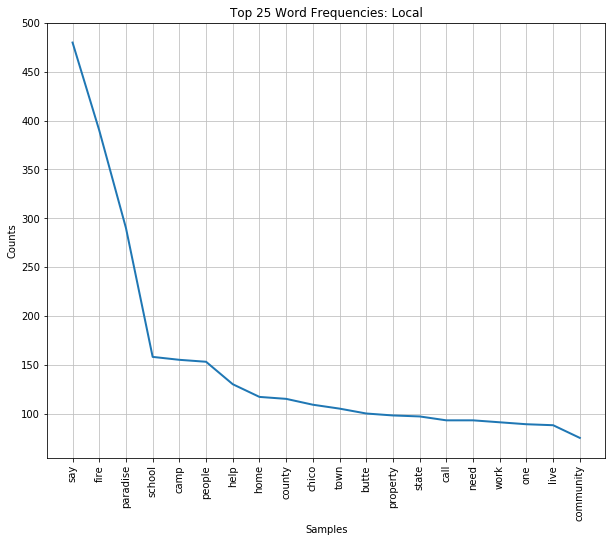

In [66]:
token_plot(date_sort)

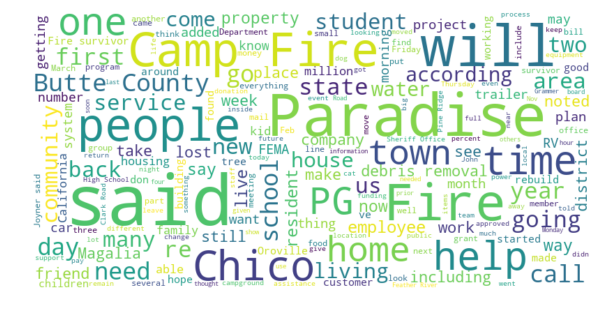

In [67]:
plt.rcParams["figure.figsize"] = [10, 8]
doc = ' '.join(date_sort['text'].tolist())
wordcloud = WordCloud(width = 800,
                     height = 400,
                     max_font_size = 100,
                     background_color = "white").generate(doc)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [68]:
def tokenize_lemm(dataframe):
    """takes dataframe and desired subset (should be a string). outputs tokenized plot of text"""
    #tokenize
    corpus = all_text(dataframe)
    biz_token = nltk.word_tokenize(corpus)
    #resetting index to make sure all_text works 

    #lower case
    biz_token[:10]
    lower = [w.lower() for w in biz_token]
    lower[:10]

    #lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    tags = nltk.pos_tag(lower)
    lemm = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in tags]

    #stopwords
    stopwords = nltk.corpus.stopwords.words("english") + ["say", "pg", "e", "would", "make", "also", "could", "get", "go"]
    full = [w for w in lemm if w not in stopwords]
    
    return full

## not to be used 

In [69]:
token_lemm = tokenize_lemm(date_sort)

## not to be used

In [70]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [71]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [72]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
text_list = date_sort["text"].tolist()
vec = TfidfVectorizer(min_df = 0.05, tokenizer = tokenize_and_stem, 
                      stop_words = "english", 
                      sublinear_tf = True)
tfidf = vec.fit_transform(text_list)

In [73]:
text_list

['PARADISE — Emotions and tempers ran high Monday morning as the Paradise Town Council held an open, emergency meeting before voting on a new ordinance that would make it illegal for Camp Fire survivors to live in recreational vehicles on property with burned debris. The decision comes a little more than a week after the town council and the Butte County Board of Supervisors were informed that the previously-passed ordinances that allowed residents to live in RVs more than 100 feet from debris could jeopardize the $1.7 billion in Federal Emergency Management Agency funding earmarked for debris removal. The new urgency ordinance, No. 575, replaces Urgency Ordinance No. 573, and changes who is allowed to be on property with burned debris before removal and when. Under Ordinance No. 573 passed in December, residents living in temporary housing — RVs and trailers — with a qualifying destroyed structure for debris removal would be able to live on the property up until the time of clean up, 

In [74]:
tfidf

<80x1042 sparse matrix of type '<class 'numpy.float64'>'
	with 8845 stored elements in Compressed Sparse Row format>

In [75]:
terms = vec.get_feature_names()
terms[:5]

['a.m.', 'able', 'accepting', 'according', 'activity']

In [76]:
#tfidf bigram
vec_bigram = TfidfVectorizer(min_df = 0.075,
                             max_df = 0.8,
                             tokenizer = tokenize_and_stem,
                             stop_words = "english",
                             sublinear_tf = True,
                             ngram_range=(2,2))
tfidf = vec_bigram.fit_transform(text_list)

In [77]:
terms_bigram = vec_bigram.get_feature_names()
terms_bigram

['a.m. p.m.',
 'affected camp',
 'alternative debris',
 'butte county',
 'butte strong',
 'cal oes',
 'camp survivors',
 'clark road',
 'company s',
 'county sheriff',
 'debris removal',
 'destructive wildfire',
 'didn t',
 'doesn t',
 'don t',
 'e s',
 'elementary school',
 'gavin newsom',
 'gerald rodrigues',
 'going come',
 'high school',
 'impacted camp',
 'intermediate school',
 'isn t',
 'little bit',
 'lost home',
 'lot people',
 'make sure',
 'mobile home',
 'north valley',
 'paradise high',
 'paradise intermediate',
 'paradise town',
 'paradise unified',
 'pg e',
 'pine ridge',
 'press release',
 'property owners',
 'removal program',
 'ridge school',
 's good',
 's office',
 'said don',
 'said people',
 'said s',
 'san bruno',
 'school district',
 'school paradise',
 'school students',
 'sheriff s',
 'state s',
 'strong fund',
 't know',
 't want',
 'town paradise',
 'unified school',
 'wasn t',
 'won t']

In [83]:
###Sample of 50 
paradise_sample = date_sort.sample(n = 50)

#reset index
paradise_sample = paradise_sample.reset_index()

#source column (local)
paradise_sample['source'] = "Local"

#remove unneccessary columns 
paradise_sample = paradise_sample.drop(["dates", "url", "index"], axis = 1)
paradise_sample

,text,title,source
0,"Old Barn Kitchen, a restaurant that opened in ...",Old Barn Kitchen opens in Chico tomorrow,Local
1,CHICO — The North Valley Community Foundation ...,North Valley Community Foundation releases $10...,Local
2,The first of series of listening sessions for ...,Workshop invites residents to plan rebuilding ...,Local
3,"Kailey Elliott, a 31-year-old cancer survivor ...",Camp Fire survivor’s “rough road” after evacua...,Local
4,CHICO — Butte County is accepting applications...,County accepting applications for alternative ...,Local
5,CHICO — The North Valley Community Foundation ...,North Valley Community Foundation releases $10...,Local
6,CHICO — The North Valley Community Foundation ...,"NVCF awards grants for schools, long-term reco...",Local
7,The Butte County Sheriff/Coroner’s office anno...,Butte County released the names of two Camp Fi...,Local
8,Seventy-four victims of the Camp Fire have bee...,Help needed to learn more about three victims,Local
9,OROVILLE — California State Parks has granted ...,Lime Saddle Campground in Oroville opened excl...,Local


In [84]:
paradise_sample.to_pickle("paradise_merge.txt")